In [0]:
import joblib
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
import tensorflow as tf
from keras.backend import set_session

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import seaborn as sns
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
import tensorflow as tf
config = tf.ConfigProto(intra_op_parallelism_threads=1000, 
                        inter_op_parallelism_threads=1000, 
                        allow_soft_placement=True)
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

In [0]:
!curl --header "Host: doc-04-70-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,mr;q=0.6,hi;q=0.5,pa;q=0.4" --header "Referer: https://docs.google.com/uc?id=0Bz1dfcnrpXM-MUt4cHNzUEFXcmc&export=download" --header "Cookie: AUTH_060o40qn8ku28qrtl1pv0ncv4ack86se_nonce=gfpj66ccsoepa" --header "Connection: keep-alive" "https://doc-04-70-docs.googleusercontent.com/docs/securesc/nn6dcriv8h10geq4m0m21f46ihk9dji9/5og25al7i8iqfls1173lmdqrh4b4noi8/1566108000000/18137660436632322230/00179091389856197121/0Bz1dfcnrpXM-MUt4cHNzUEFXcmc?e=download&nonce=gfpj66ccsoepa&user=00179091389856197121&hash=bjqf8ifci2or7q7pfsquiuhvd58vt8r7" -o "rvl-cdip.tar.gz" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.1G    0 36.1G    0     0  98.4M      0 --:--:--  0:06:15 --:--:-- 80.3M


In [0]:
import shutil

shutil.unpack_archive('rvl-cdip.tar.gz','/data')

In [0]:
paths=joblib.load("paths")

In [0]:
labels=joblib.load("labels")

In [0]:
y_train=labels[0]
y_test=labels[1]
y_cv=labels[2]              

In [0]:
for x in paths:
    for i in range(len(x)):
        x[i]="/data/images/"+x[i]

In [0]:
train=paths[0]
test=paths[1]
cv=paths[2]

In [0]:
import skimage.io
for image in train[:10]:
        im = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
        print(im.shape)

(1000, 754)
(1000, 771)
(1000, 795)
(1000, 806)
(1000, 754)
(1000, 754)
(1000, 754)
(1000, 754)
(1000, 752)
(1000, 802)


In [0]:
train_width=[]
test_width=[]
cv_width=[]
count=0
for image in train[:100]:
        im = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
        train_width.append(im.shape[1])
for image in test[:100]:
        im = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
        test_width.append(im.shape[1])
        count+=1
        
for image in cv[:100]:
        im = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
        cv_width.append(im.shape[1])        

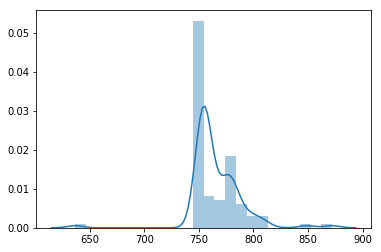

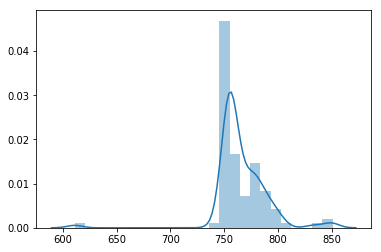

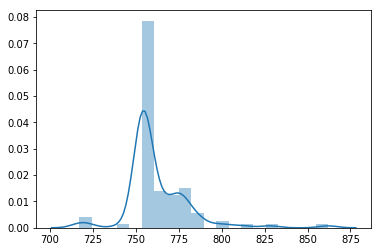

In [0]:
import seaborn as sb
from matplotlib import pyplot as plt
width=(train_width,test_width,cv_width)

for x in width:
        sb.distplot(x,kde = True)
        plt.show()

THERE A ALOT OF VARIANCE IN THE WIDTH

In [0]:
from imutils import paths

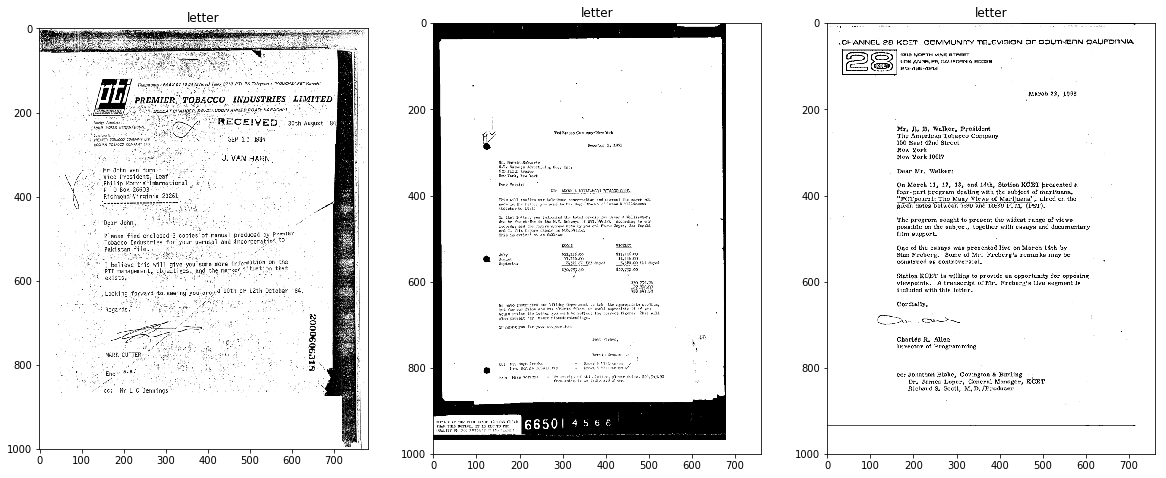

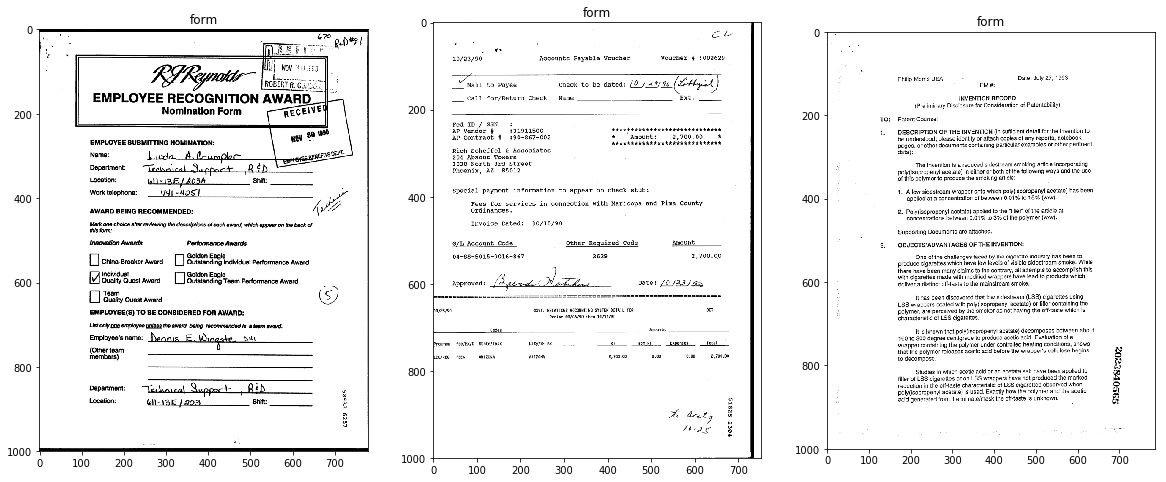

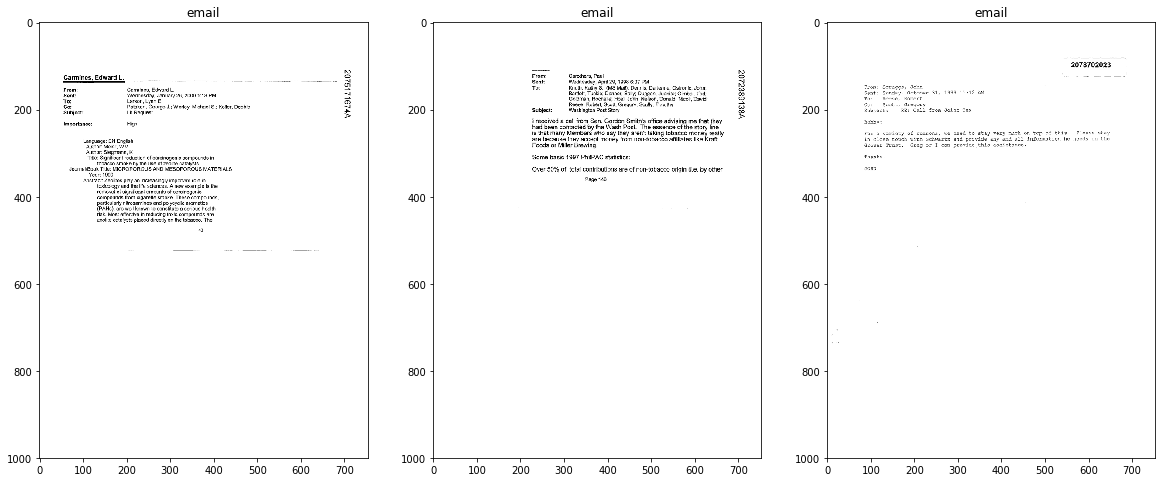

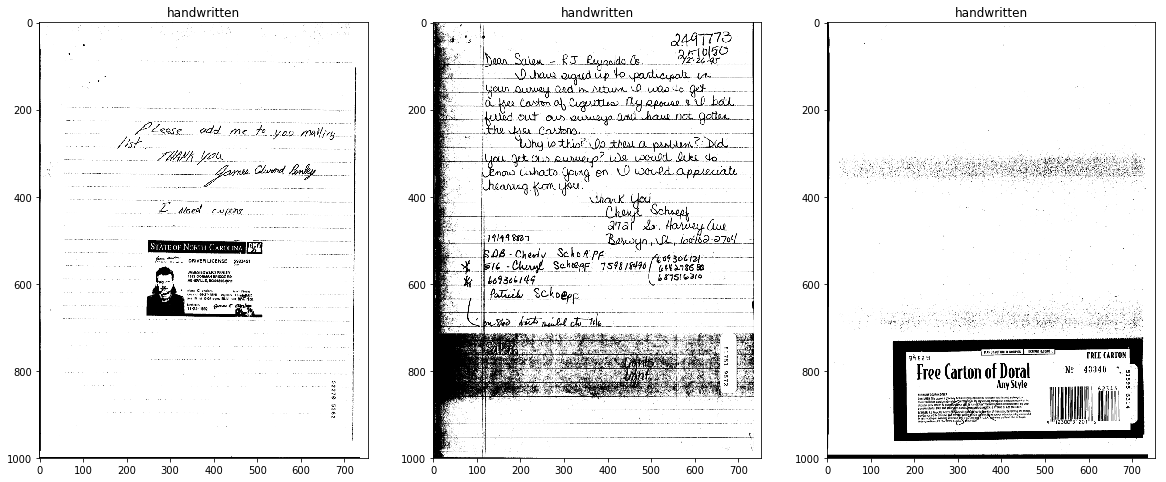

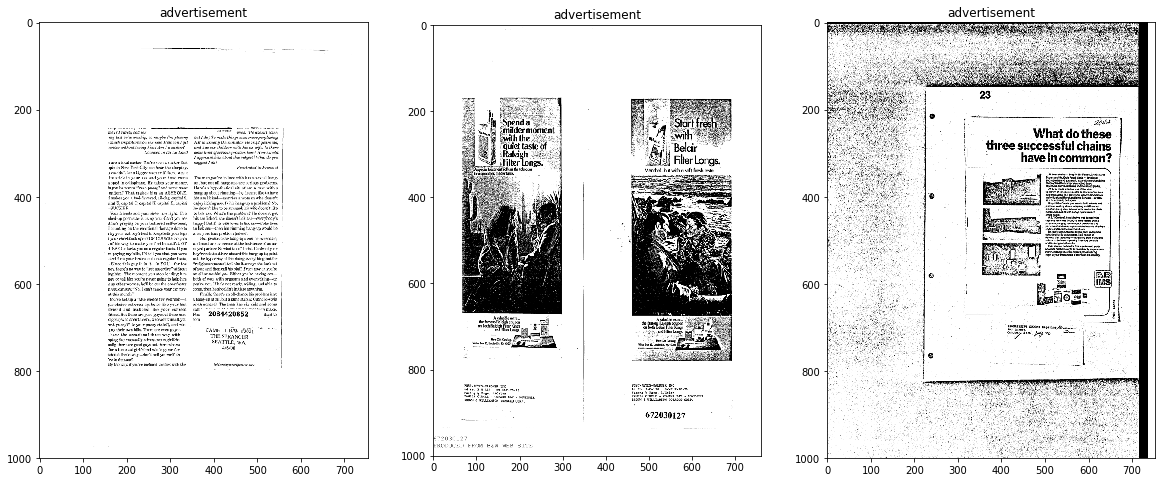

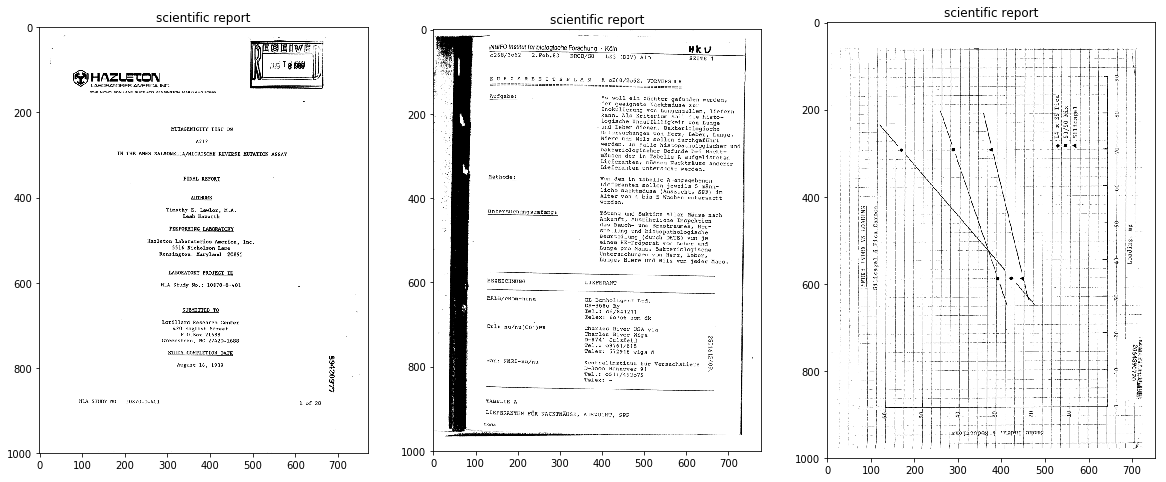

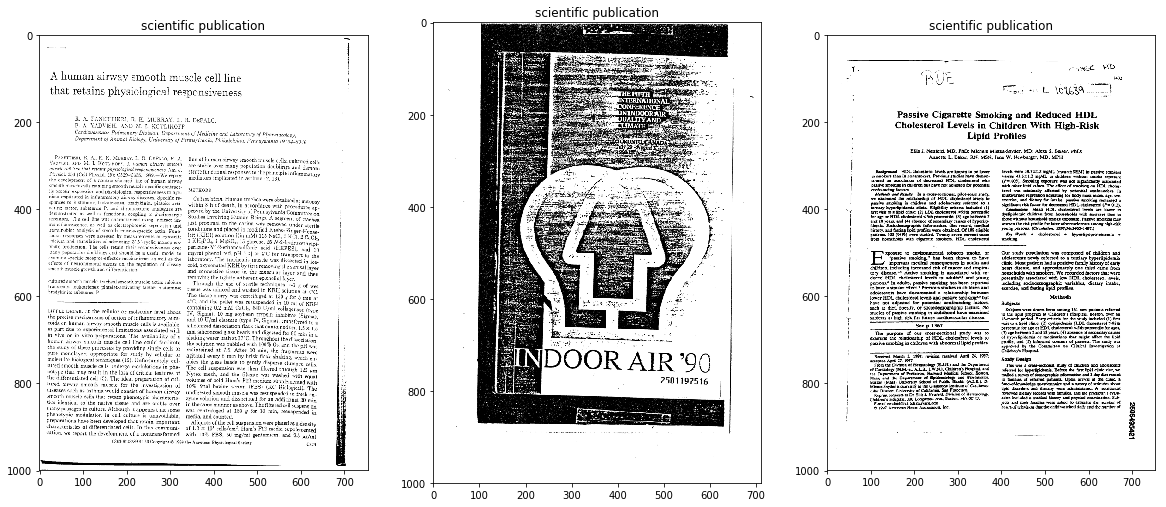

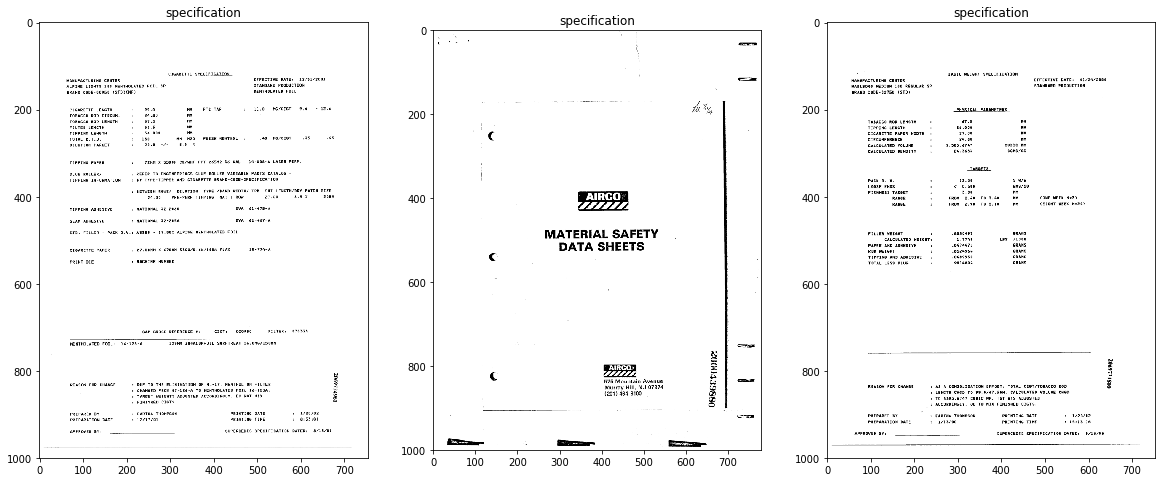

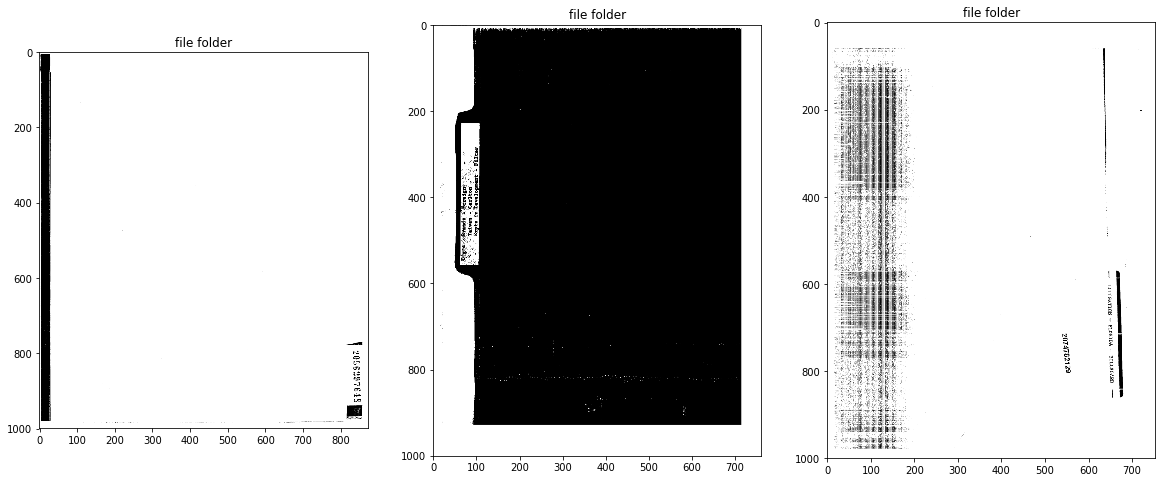

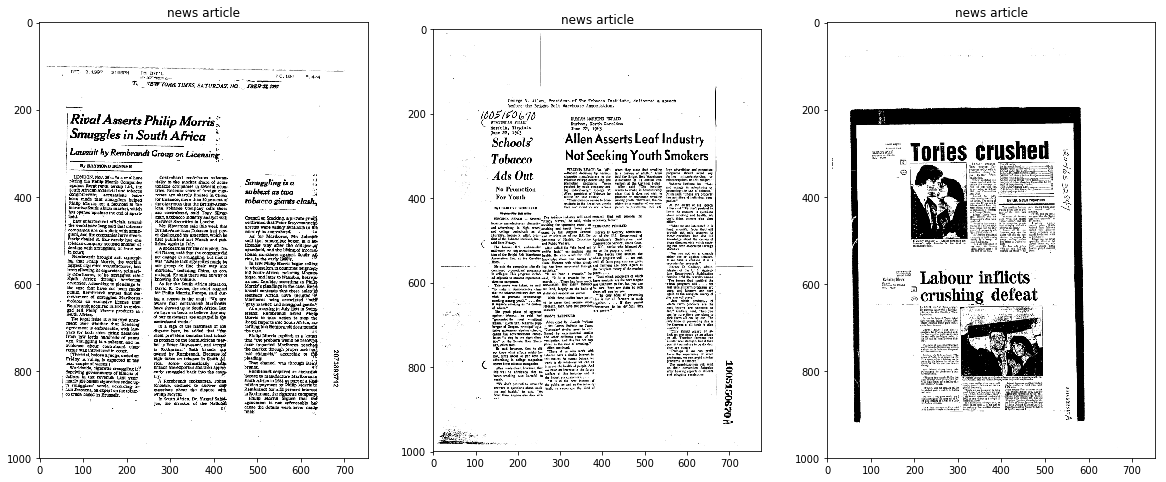

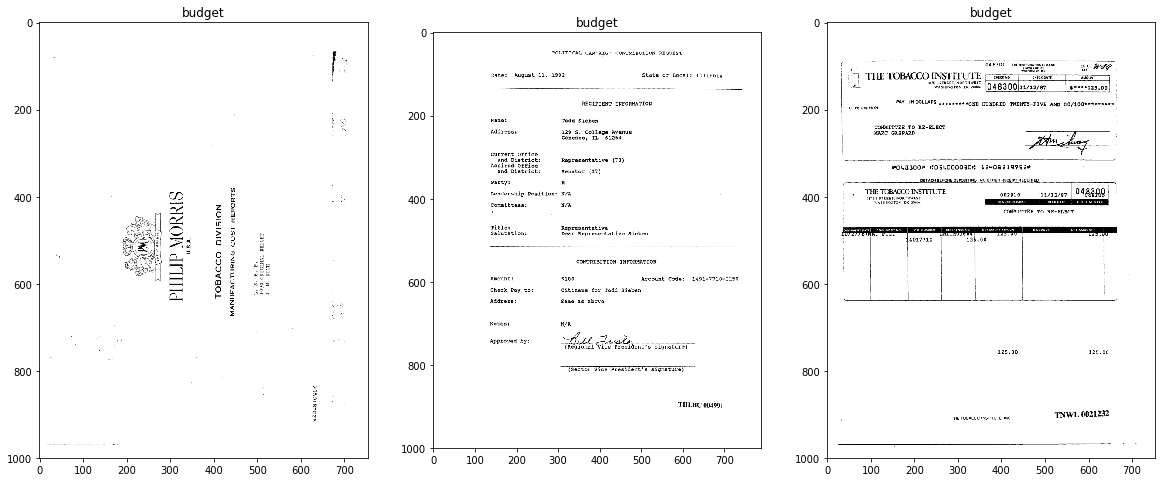

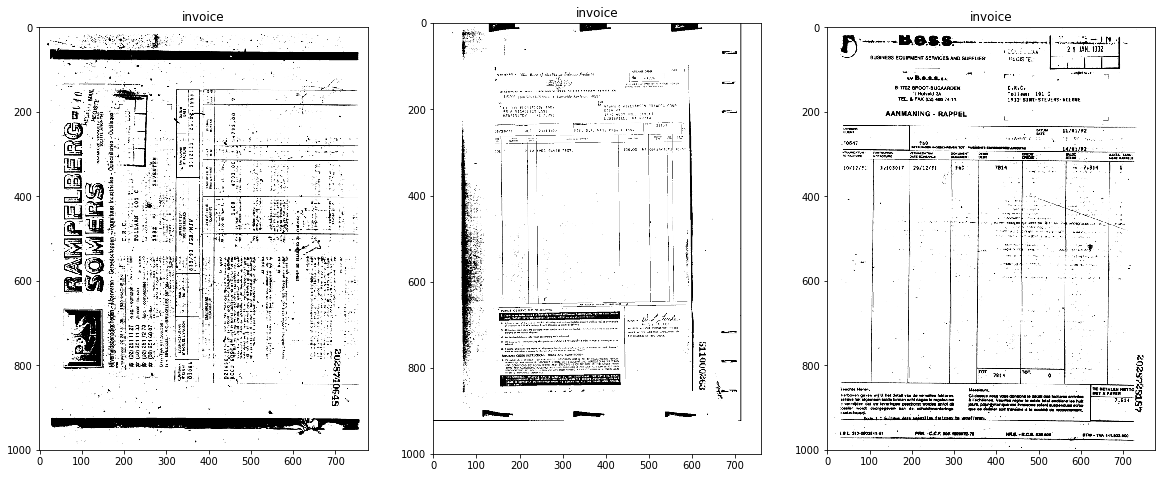

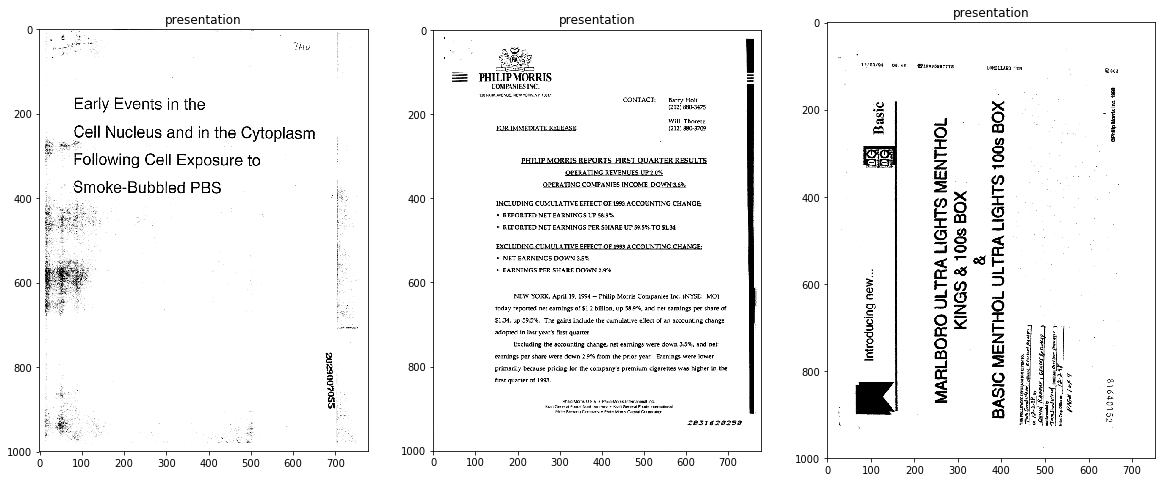

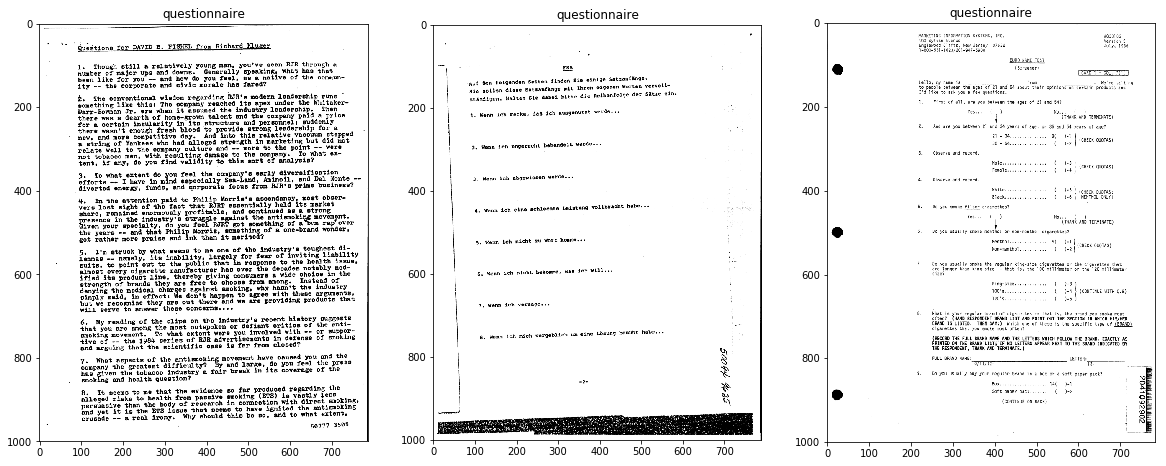

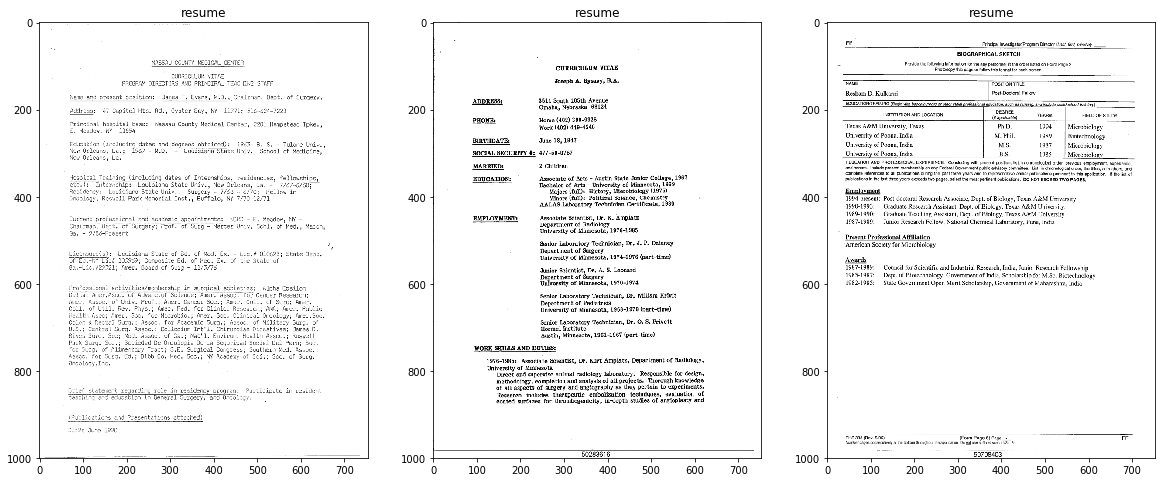

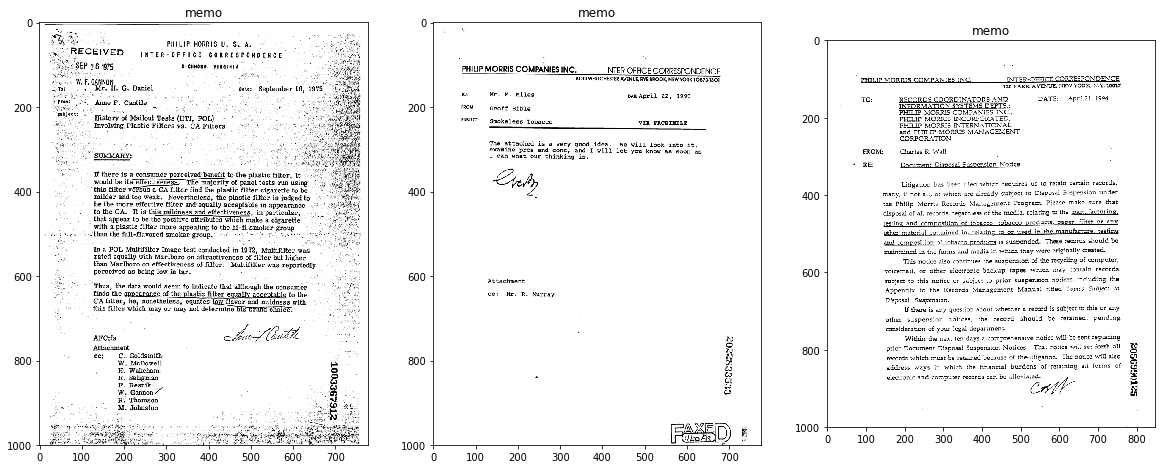

In [0]:

for i in range(0,16):
    path=list(paths.list_images('/dataset/test/'+str(i)))[:3]
    fig,axes = plt.subplots(1, 3,figsize=(20,20))
    for j in range(3):
      im = cv2.imread(path[j],cv2.IMREAD_GRAYSCALE)
      axes[j].imshow(im, cmap='gray')
      axes[j].set_title(str(doc_type[i]))

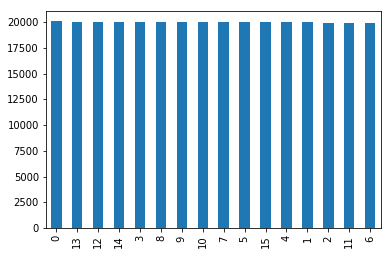

In [0]:
df_train.labels.value_counts().plot(kind='bar')

In [0]:
df_train=pd.DataFrame(list(zip(train,y_train)),columns=['paths','labels'])
df_test=pd.DataFrame(list(zip(test,y_test)),columns=['paths','labels'])
df_cv=pd.DataFrame(list(zip(cv,y_cv)),columns=['paths','labels'])

In [0]:
df_train.labels=df_train.labels.astype(int)
df_test.labels=df_test.labels.astype(int)
df_cv.labels=df_cv.labels.astype(int)

In [0]:
import os
for i in range(0,16):
    if not os.path.exists("/dataset/train/"+str(i)):
        os.makedirs("/dataset/train/"+str(i))

In [0]:
import os
import shutil

for i in range(0,16):
    paths=list(df_train[df_train.labels==i].paths.values)[:10000]
    for path in paths:
        try:
            shutil.move(path,"/dataset/train/"+str(i))
        except:
             pass

In [0]:
for i in range(0,16):
    if not os.path.exists("/dataset/test/"+str(i)):
        os.makedirs("/dataset/test/"+str(i))

In [0]:
import os
import shutil

for i in range(0,16):
    paths=list(df_test[df_test.labels==i].paths.values)
    for path in paths:
        try:
            shutil.move(path,"/dataset/test/"+str(i))
        except:
             pass

In [0]:
for i in range(0,16):
    if not os.path.exists("/dataset/cv/"+str(i)):
        os.makedirs("/dataset/cv/"+str(i))

In [0]:
import os
import shutil

for i in range(0,16):
    paths=list(df_cv[df_cv.labels==i].paths.values)
    for path in paths:
        try:
            shutil.move(path,"/dataset/cv/"+str(i))
        except:
             pass

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [0]:
train_it = train_datagen.flow_from_directory('/dataset/train/',batch_size=32,target_size=(256, 256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('/dataset/test/',batch_size=32,target_size=(256, 256))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('/dataset/cv/', batch_size=32,target_size=(256, 256))

Found 159951 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


## **TRANFER LEARNING WITH IMAGENET INITIALIZED VGG**

In [0]:
from keras.optimizers import Adam

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 256,256
batch_size = 32
epochs = 50


model =keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_1.hdf5', save_best_only=True, monitor='acc', mode='max')

In [0]:
from keras.layers import GlobalAveragePooling2D

In [0]:
for layer in model.layers:
    layer.trainable=True

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/media/aaic/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_final.fit_generator(
train_it,
steps_per_epoch =159951/32,
epochs=10,    
validation_data=cv_it,
validation_steps=39995/32,
callbacks=[reduce_lr,mcp_save])

Epoch 1/10
4999/4998 [==============================] - 7702s 2s/step - loss: 1.0862 - acc: 0.6754 - val_loss: 0.7225 - val_acc: 0.7836
Epoch 2/10
4999/4998 [==============================] - 7919s 2s/step - loss: 0.6525 - acc: 0.8090 - val_loss: 0.5321 - val_acc: 0.8405
Epoch 3/10
4999/4998 [==============================] - 7888s 2s/step - loss: 0.5217 - acc: 0.8467 - val_loss: 0.4950 - val_acc: 0.8613
Epoch 4/10
4999/4998 [==============================] - 7868s 2s/step - loss: 0.4390 - acc: 0.8696 - val_loss: 0.4606 - val_acc: 0.8678
Epoch 5/10
4999/4998 [==============================] - 7906s 2s/step - loss: 0.3669 - acc: 0.8896 - val_loss: 0.4755 - val_acc: 0.8717
Epoch 6/10
4999/4998 [==============================] - 7958s 2s/step - loss: 0.3104 - acc: 0.9048 - val_loss: 0.4846 - val_acc: 0.8734
Epoch 7/10
4999/4998 [==============================] - 7871s 2s/step - loss: 0.1802 - acc: 0.9430 - val_loss: 0.4789 - val_acc: 0.8882
Epoch 8/10
4999/4998 [==========================

In [0]:
model_final.load_weights('model_1.hdf5')

In [0]:
score=model_final.evaluate_generator(test_it,steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

/media/aaic/data/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
print("The accuracy for model-Pretrained vgg-16 initiazlied with image net:",score[1]*100,"%")

The accuracy for model-Pretrained vgg-16 initiazlied with image net: 88.9476837060703 %


# **FINE TUNING LAST CNN LAYER OF VGG**

In [0]:
model_2 = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model_2.layers:
    layer.trainable=False  
model_2.layers[-2].trainable=True    

#Adding custom Layers 
x = model_2.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_2 = Model(input = model_2.input, output = predictions)

# compile the model 
model_final_2.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


W0817 15:03:49.732222 140186150360960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
W0817 15:03:49.795196 140186150360960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model_final_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
history=model_final_2.fit_generator(
train_it,
steps_per_epoch =159951/128,
epochs=20,    
validation_data=cv_it,
validation_steps=39995/128,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/20
1250/1249 [==============================] - 701s 560ms/step - loss: 1.4504 - acc: 0.5579 - val_loss: 0.9529 - val_acc: 0.7139
Epoch 2/20
1250/1249 [==============================] - 691s 553ms/step - loss: 1.0256 - acc: 0.6934 - val_loss: 0.8192 - val_acc: 0.7550
Epoch 3/20
1250/1249 [==============================] - 693s 554ms/step - loss: 0.9135 - acc: 0.7277 - val_loss: 0.7362 - val_acc: 0.7804
Epoch 4/20
1250/1249 [==============================] - 698s 558ms/step - loss: 0.8318 - acc: 0.7546 - val_loss: 0.7043 - val_acc: 0.7895
Epoch 5/20
1250/1249 [==============================] - 693s 554ms/step - loss: 0.7373 - acc: 0.7814 - val_loss: 0.6691 - val_acc: 0.8027
Epoch 6/20
1250/1249 [==============================] - 693s 555ms/step - loss: 0.7052 - acc: 0.7917 - val_loss: 0.6417 - val_acc: 0.8072
Epoch 7/20
1250/1249 [==============================] - 693s 554ms/step - loss: 0.6987 - acc: 0.7934 - val_loss: 0.6067 - val_acc: 0.8138
Epoch 8/20
1250/1249 [============

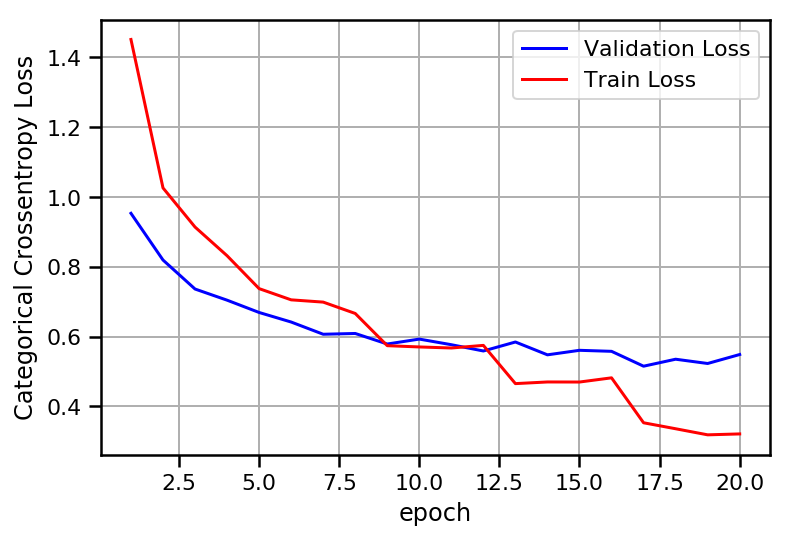

In [0]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,20+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
score=model_final_2.evaluate_generator(test_it,steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

In [0]:
print("The accuracy for model-Pretrained vgg-16 fine-tuning the last CNN vgg layer:",score[1]*100,"%")

The accuracy for model-Pretrained vgg-16 fine-tuning the last CNN vgg layer: 85.25359424920129 %


# **FINE TUNING LAST 2 CNN LAYERS OF VGG-16**

In [0]:
model_3 = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model_3.layers:
    layer.trainable=False  
model_3.layers[-2].trainable=True
model_3.layers[-3].trainable=True      

#Adding custom Layers 
x = model_3.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_3 = Model(input = model_3.input, output = predictions)

# compile the model 
model_final_3.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
model_final_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
history=model_final_3.fit_generator(
train_it,
steps_per_epoch =159951/128,
epochs=20,    
validation_data=cv_it,
validation_steps=39995/128,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/20
1250/1249 [==============================] - 492s 393ms/step - loss: 1.4027 - acc: 0.5747 - val_loss: 0.9170 - val_acc: 0.7213
Epoch 2/20
1250/1249 [==============================] - 474s 379ms/step - loss: 0.9560 - acc: 0.7157 - val_loss: 0.7556 - val_acc: 0.7745
Epoch 3/20
1250/1249 [==============================] - 469s 375ms/step - loss: 0.8370 - acc: 0.7555 - val_loss: 0.6564 - val_acc: 0.8046
Epoch 4/20
1250/1249 [==============================] - 476s 381ms/step - loss: 0.7718 - acc: 0.7746 - val_loss: 0.6825 - val_acc: 0.8005
Epoch 5/20
1250/1249 [==============================] - 471s 377ms/step - loss: 0.6602 - acc: 0.8055 - val_loss: 0.6275 - val_acc: 0.8129
Epoch 6/20
1250/1249 [==============================] - 479s 383ms/step - loss: 0.6541 - acc: 0.8079 - val_loss: 0.5901 - val_acc: 0.8214
Epoch 7/20
1250/1249 [==============================] - 481s 385ms/step - loss: 0.6183 - acc: 0.8171 - val_loss: 0.5715 - val_acc: 0.8292
Epoch 8/20
1250/1249 [============

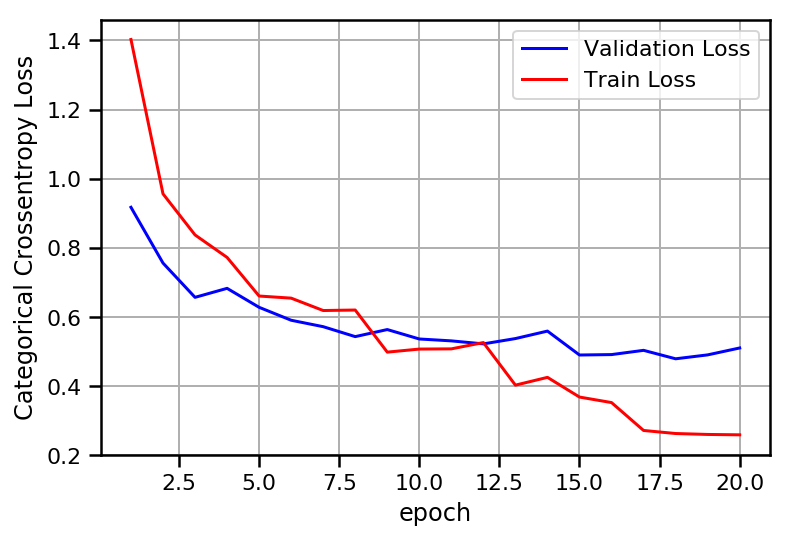

In [0]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,20+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
score=model_final_3.evaluate_generator(test_it,steps=39997/256,workers=2, use_multiprocessing=True, verbose=0)

/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
print("The accuracy for model-Pretrained vgg-16 fine-tuning the last 2 CNN vgg layer:",score[1]*100,"%")

The accuracy for model-Pretrained vgg-16 fine-tuning the last 2 CNN vgg layer: 86.60429936305732 %


# **FINE TUNING VGG-REGION SPECIFIC**

**TOP REGION**

In [0]:
model_2 =keras.applications.vgg16.VGG16(weights = None, include_top=False, input_shape = (256,256, 3),)

In [0]:
mcp_save = ModelCheckpoint('model_2.hdf5', save_best_only=True, monitor='acc', mode='max')

In [0]:
for layer in model_2.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_2.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_2 = Model(input = model_2.input, output = predictions)

# compile the model 
model_final_2.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


/media/aaic/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
model_final_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_final_2.load_weights('model_1.hdf5')

In [0]:
def height_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:256,:,:]
        yield (batch_Xcrops,label)


In [0]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [0]:
train_it_2 = train_datagen.flow_from_directory('dataset/train/',batch_size=32,target_size=(512,256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('dataset/test/',batch_size=32,target_size=(512,256))
# load and iterate test dataset
cv_it_2 = cv_datagen.flow_from_directory('dataset/cv/', batch_size=32,target_size=(512,256))

Found 159951 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
history=model_final_2.fit_generator(
height_crop_generator(train_it_2),
steps_per_epoch =159951/128,
epochs=5,    
validation_data=height_crop_generator(cv_it_2),
validation_steps=39995/128,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/5
1250/1249 [==============================] - 1588s 1s/step - loss: 0.9180 - acc: 0.7351 - val_loss: 0.7243 - val_acc: 0.7881
Epoch 2/5
1250/1249 [==============================] - 1877s 2s/step - loss: 0.7239 - acc: 0.7893 - val_loss: 0.6538 - val_acc: 0.8106
Epoch 3/5
1250/1249 [==============================] - 1968s 2s/step - loss: 0.6646 - acc: 0.8060 - val_loss: 0.6309 - val_acc: 0.8152
Epoch 4/5
1250/1249 [==============================] - 1950s 2s/step - loss: 0.6311 - acc: 0.8177 - val_loss: 0.5941 - val_acc: 0.8281
Epoch 5/5
1250/1249 [==============================] - 1484s 1s/step - loss: 0.5170 - acc: 0.8473 - val_loss: 0.5640 - val_acc: 0.8361


In [0]:
score=model_final_2.evaluate_generator(height_crop_generator(test_it),steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

/media/aaic/data/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


**BOTTOM REGION**

In [0]:
model_bottom =keras.applications.vgg16.VGG16(weights = None, include_top=False, input_shape = (256,256, 3))

In [0]:
for layer in model_bottom.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_bottom.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_bottom = Model(input = model_bottom.input, output = predictions)

# compile the model 
model_final_bottom.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


/media/aaic/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
mcp_save = ModelCheckpoint('model_bottom.hdf5', save_best_only=True, monitor='acc', mode='max')

In [0]:
model_final_bottom.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_final_bottom.load_weights('model_1.hdf5')

In [0]:
def bottom_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][-256:,:,:]
        yield (batch_Xcrops,label)


In [0]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [0]:
train_it = train_datagen.flow_from_directory('dataset/train/',batch_size=32,target_size=(512,256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('dataset/test/',batch_size=32,target_size=(512,256))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('dataset/cv/', batch_size=32,target_size=(512,256))

Found 159951 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
history=model_final_bottom.fit_generator(
bottom_crop_generator(train_it),
steps_per_epoch =159951/128,
epochs=5,    
validation_data=bottom_crop_generator(cv_it),
validation_steps=39995/128,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/5
1250/1249 [==============================] - 1737s 1s/step - loss: 1.0335 - acc: 0.6888 - val_loss: 0.8264 - val_acc: 0.7480
Epoch 2/5
1250/1249 [==============================] - 2154s 2s/step - loss: 0.8252 - acc: 0.7520 - val_loss: 0.7465 - val_acc: 0.7714
Epoch 3/5
1250/1249 [==============================] - 2262s 2s/step - loss: 0.7700 - acc: 0.7680 - val_loss: 0.7116 - val_acc: 0.7825
Epoch 4/5
1250/1249 [==============================] - 2274s 2s/step - loss: 0.7457 - acc: 0.7761 - val_loss: 0.6861 - val_acc: 0.7931
Epoch 5/5
1250/1249 [==============================] - 1745s 1s/step - loss: 0.6223 - acc: 0.8106 - val_loss: 0.6782 - val_acc: 0.7965


In [0]:
model_final_bottom.load_weights('model_bottom.hdf5')

In [0]:
score=model_final_bottom.evaluate_generator(bottom_crop_generator(test_it),steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

/media/aaic/data/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
print("The accuracy for model intradomain transfer learning for bottom region:",score[1]*100,"%")

The accuracy for model intradomain transfer learning for bottom region: 79.50279552715655 %


**LEFT REGION**

In [0]:
model_left =keras.applications.vgg16.VGG16(weights = None, include_top=False, input_shape = (256,256, 3))

In [0]:
for layer in model_left.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_left.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_left = Model(input = model_left.input, output = predictions)

# compile the model 
model_final_left.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


/media/aaic/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
mcp_save = ModelCheckpoint('model_left.hdf5', save_best_only=True, monitor='acc', mode='max')

In [0]:
model_final_left.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_final_left.load_weights('model_1.hdf5')

In [0]:
def left_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:,:256,:]
        yield (batch_Xcrops,label)


In [0]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [0]:
train_it = train_datagen.flow_from_directory('dataset/train/',batch_size=32,target_size=(256,512))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('dataset/test/',batch_size=32,target_size=(256,512))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('dataset/cv/', batch_size=32,target_size=(256,512))

Found 159951 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
history=model_final_left.fit_generator(
left_crop_generator(train_it),
steps_per_epoch =159951/128,
epochs=5,    
validation_data=left_crop_generator(cv_it),
validation_steps=39995/128,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/5
1250/1249 [==============================] - 1811s 1s/step - loss: 0.9154 - acc: 0.7308 - val_loss: 0.7159 - val_acc: 0.7891
Epoch 2/5
1250/1249 [==============================] - 2245s 2s/step - loss: 0.7061 - acc: 0.7932 - val_loss: 0.6919 - val_acc: 0.7984
Epoch 3/5
1250/1249 [==============================] - 2308s 2s/step - loss: 0.6646 - acc: 0.8057 - val_loss: 0.6240 - val_acc: 0.8204
Epoch 4/5
1250/1249 [==============================] - 2289s 2s/step - loss: 0.6373 - acc: 0.8155 - val_loss: 0.6035 - val_acc: 0.8187
Epoch 5/5
1250/1249 [==============================] - 1759s 1s/step - loss: 0.5163 - acc: 0.8468 - val_loss: 0.5923 - val_acc: 0.8286


In [0]:
score=model_final_left.evaluate_generator(left_crop_generator(test_it),steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

/media/aaic/data/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
print("The accuracy for model intradomain transfer learning for left region:",score[1]*100,"%")

The accuracy for model intradomain transfer learning for left region: 83.06709265175719 %


**RIGHT REGION**

In [0]:
model_right =keras.applications.vgg16.VGG16(weights = None, include_top=False, input_shape = (256,256, 3))

In [0]:
for layer in model_right.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_right.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_right = Model(input = model_right.input, output = predictions)

# compile the model 
model_final_right.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])


/media/aaic/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
mcp_save = ModelCheckpoint('model_right.hdf5', save_best_only=True, monitor='acc', mode='max')

In [0]:
model_final_right.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model_final_right.load_weights('model_1.hdf5')

In [0]:
def right_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:,-256:,:]
        yield (batch_Xcrops,label)


In [0]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [0]:
train_it = train_datagen.flow_from_directory('dataset/train/',batch_size=32,target_size=(256,512))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('dataset/test/',batch_size=32,target_size=(256,512))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('dataset/cv/', batch_size=32,target_size=(256,512))

Found 159951 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
history=model_final_right.fit_generator(
right_crop_generator(train_it),
steps_per_epoch =159951/128,
epochs=5,    
validation_data=right_crop_generator(cv_it),
validation_steps=39995/128,
callbacks=[reduce_lr,mcp_save]
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1250/1249 [==============================] - 1495s 1s/step - loss: 0.9546 - acc: 0.7124 - val_loss: 0.7549 - val_acc: 0.7715
Epoch 2/5
1250/1249 [==============================] - 1942s 2s/step - loss: 0.7480 - acc: 0.7744 - val_loss: 0.6755 - val_acc: 0.7964
Epoch 3/5
1250/1249 [==============================] - 1965s 2s/step - loss: 0.6815 - acc: 0.7956 - val_loss: 0.6381 - val_acc: 0.8067
Epoch 4/5
1250/1249 [==============================] - 1936s 2s/step - loss: 0.6494 - acc: 0.8043 - val_loss: 0.6096 - val_acc: 0.8213
Epoch 5/5
1250/1249 [==============================] - 1467s 1s/step - loss: 0.5501 - acc: 0.8335 - val_loss: 0.6178 - val_acc: 0.8175


In [0]:
score=model_final_right.evaluate_generator(right_crop_generator(test_it),steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

/media/aaic/data/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
print("The accuracy for model intradomain transfer learning for right region:",score[1]*100,"%")

The accuracy for model intradomain transfer learning for right region: 81.35982428115017 %


# **EXTRACTING OUTPUT FROM ALL THE REGION SPECIFIC MODELS**

In [0]:
model_final_2.load_weights('model_2.hdf5')
model_final_bottom.load_weights('model_bottom.hdf5')
model_final_left.load_weights('model_left.hdf5')
model_final_right.load_weights('model_right.hdf5')

In [0]:
train_it_tb = train_datagen.flow_from_directory('dataset/train/',batch_size=1,target_size=(512,256),shuffle=False)
# load and iterate validation dataset
test_it_tb = test_datagen.flow_from_directory('dataset/test/',batch_size=1,target_size=(512,256),shuffle=False)
# load and iterate test dataset
cv_it_tb = cv_datagen.flow_from_directory('dataset/cv/', batch_size=1,target_size=(512,256),shuffle=False)

Found 159951 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
feature_top = model_final_2.predict_generator(height_crop_generator(cv_it_tb),steps = 39995)
feature_bottom = model_final_bottom.predict_generator(bottom_crop_generator(cv_it_tb),steps = 39995)

In [0]:
train_it_lr = train_datagen.flow_from_directory('dataset/train/',batch_size=1,target_size=(256,512),shuffle=False)
# load and iterate validation dataset
test_it_lr = test_datagen.flow_from_directory('dataset/test/',batch_size=1,target_size=(256,512),shuffle=False)
# load and iterate test dataset
cv_it_lr = cv_datagen.flow_from_directory('dataset/cv/', batch_size=1,target_size=(256,512),shuffle=False)

Found 159951 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
feature_left = model_final_left.predict_generator(left_crop_generator(cv_it_lr),steps = 39995)
feature_right = model_final_right.predict_generator(right_crop_generator(cv_it_lr),steps = 39995)

In [0]:
import joblib

joblib.dump(feature_top,'top')
joblib.dump(feature_bottom,'bottom')
joblib.dump(feature_left,'left')
joblib.dump(feature_right,'right')


['right']

In [0]:
train_it_e = train_datagen.flow_from_directory('dataset/train/',batch_size=1,target_size=(256,256),shuffle=False)
# load and iterate validation dataset
test_it_e = test_datagen.flow_from_directory('dataset/test/',batch_size=1,target_size=(256,256),shuffle=False)
# load and iterate test dataset
cv_it_e = cv_datagen.flow_from_directory('dataset/cv/', batch_size=1,target_size=(256,256),shuffle=False)

Found 159951 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
model_final.load_weights('model_1.hdf5')

In [0]:
feature_holistic = model_final.predict_generator(cv_it_e,steps = 39995)

In [0]:
joblib.dump(feature_holistic,'holistic')

['holistic']

**FOR TEST DATA**

In [0]:
feature_holistic_t=model_final.predict_generator(test_it_e,steps = 39996)

In [0]:
feature_top_t = model_final_2.predict_generator(height_crop_generator(test_it_tb),steps = 39996)
feature_bottom_t= model_final_bottom.predict_generator(bottom_crop_generator(test_it_tb),steps = 39996)

In [0]:
feature_left_t = model_final_left.predict_generator(left_crop_generator(test_it_lr),steps = 39996)
feature_right_t = model_final_right.predict_generator(right_crop_generator(test_it_lr),steps = 39996)

In [0]:

joblib.dump(feature_top_t,'top_t')
joblib.dump(feature_bottom_t,'bottom_t')
joblib.dump(feature_left_t,'left_t')
joblib.dump(feature_right_t,'right_t')

['right_t']

In [0]:
joblib.dump(feature_holistic_t,'holistic_t')

['holistic_t']

**FOR TRAIN DATA**

In [0]:
159951/111

1441.0

In [0]:
feature_holistic_train=model_final.predict_generator(train_it_e,steps = 159951/111)

In [0]:
feature_top_train = model_final_2.predict_generator(height_crop_generator(train_it_tb),steps = 159951/111)
feature_bottom_train= model_final_bottom.predict_generator(bottom_crop_generator(train_it_tb),steps = 159951/111)

In [0]:
feature_left_train = model_final_left.predict_generator(left_crop_generator(train_it_lr),steps = 159951/111)

In [0]:
feature_right_train = model_final_right.predict_generator(right_crop_generator(train_it_lr),steps = 159951/111)

In [0]:
joblib.dump(feature_holistic_train,'holistic_train')
joblib.dump(feature_top_train,'top_train')
joblib.dump(feature_bottom_train,'bottom_train')
joblib.dump(feature_left_train,'left_train')
joblib.dump(feature_right_train,'right_train')

['right_train']

## **Intra-Domain Transfer Learning and Stacked Generalization** 

Reference : - https://arxiv.org/pdf/1801.09321v3.pdf

### **REGION BASED STACK GENEARALIZATION BASE CLASSIFIERS**

**STACKING AND CONCATING FEATURES FROM CV,TEST AND TRAIN DATA**

In [0]:
#loading the extracted features from cv data which will be used for training the stacked model
header=joblib.load('top')
footer=joblib.load('bottom')
left=joblib.load('left')
right=joblib.load('right')
holistic_features=joblib.load('holistic')

In [0]:
region_features=np.hstack((header,footer,left,right))

In [0]:
total_features=np.hstack((holistic_features,region_features))

In [0]:
total_features.shape

(39995, 80)

In [0]:
#Loading the true labels 
cv_labels=[]
for i in range(39995):
   batch=next(cv_it_tb)
   cv_labels.append(batch[1])

In [0]:
test_labels=[]
for i in range(39996):
   batch=next(test_it_tb)
   test_labels.append(batch[1])

In [0]:
train_labels=[]
for i in range(159951):
   batch=next(train_it_tb)
   train_labels.append(batch[1])

In [0]:
joblib.dump(test_labels,'test_labels')
joblib.dump(train_labels,'train_labels')
joblib.dump(cv_labels,'cv_labels')

['cv_labels']

In [0]:
#Loading the features from train data
header_test=joblib.load('top_t')
footer_test=joblib.load('bottom_t')
left_test=joblib.load('left_t')
right_test=joblib.load('right_t')
holistic_features_test=joblib.load('holistic_t')

In [0]:
total_features_test=np.hstack((header_test,footer_test,left_test,right_test,holistic_features_test))

In [0]:
total_features.shape

(39995, 80)

In [0]:
total_features_test.shape

(39996, 80)

In [0]:
#Loading the features from train data 
header_train=joblib.load('top_train')
footer_train=joblib.load('bottom_train')
left_train=joblib.load('left_train')
right_train=joblib.load('right_train')
holistic_features_train=joblib.load('holistic_train')

In [0]:
total_features_train=np.hstack((header_train,footer_train,left_train,right_train,holistic_features_train))

In [0]:
total_features_train.shape

(159951, 80)

35**`TRAINING A MLP AS A META CLASSIFIER`**

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomNormal

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(total_features.shape[1],)))
model_relu.add(Dropout(0.70))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu'))
model_relu.add(Dropout(0.70))
model_relu.add(Dense(16, activation='softmax'))


In [0]:
print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               41472     
_________________________________________________________________
dropout_54 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dense_83 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_55 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 16)                4112      
Total params: 178,960
Trainable params: 177,936
Non-trainable params: 1,024
_________________________________________________________________


In [0]:
model_relu.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(total_features,cv_labels, batch_size=256, epochs=20, verbose=1)

Epoch 1/20
39995/39995 [==============================] - 2s 56us/step - loss: 3.0273 - acc: 0.2170
Epoch 2/20
39995/39995 [==============================] - 0s 9us/step - loss: 1.7148 - acc: 0.5238
Epoch 3/20
39995/39995 [==============================] - 0s 9us/step - loss: 1.3732 - acc: 0.6391
Epoch 4/20
39995/39995 [==============================] - 0s 10us/step - loss: 1.2359 - acc: 0.6796
Epoch 5/20
39995/39995 [==============================] - 0s 10us/step - loss: 1.1377 - acc: 0.6979
Epoch 6/20
39995/39995 [==============================] - 0s 10us/step - loss: 1.0782 - acc: 0.7078
Epoch 7/20
39995/39995 [==============================] - 0s 9us/step - loss: 1.0309 - acc: 0.7167
Epoch 8/20
39995/39995 [==============================] - 0s 10us/step - loss: 0.9860 - acc: 0.7252
Epoch 9/20
39995/39995 [==============================] - 0s 9us/step - loss: 0.9490 - acc: 0.7305
Epoch 10/20
39995/39995 [==============================] - 0s 9us/step - loss: 0.9249 - acc: 0.7324
Epoc

In [0]:
score=model_relu.evaluate(total_features_test,test_labels,batch_size=32)

39996/39996 [==============================] - 1s 28us/step


In [0]:
score

[0.33539979154318017, 0.9510201019923178]

In [0]:
print("Accuracy on the test data:",score[1]*100,'%')

Accuracy on the test data: 95.10201019923178 %


In [0]:
score_train=model_relu.evaluate(total_features_train,train_labels,batch_size=32)

159951/159951 [==============================] - 4s 27us/step


In [0]:
score_train

[0.22942245914729906, 0.9805065301270866]

In [0]:
print("Accuracy on train data:",score_train[1]*100,'%')

Accuracy on train data: 98.05065301270865 %


In [0]:
import seaborn as sns
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x,ty,colors=['b']):
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

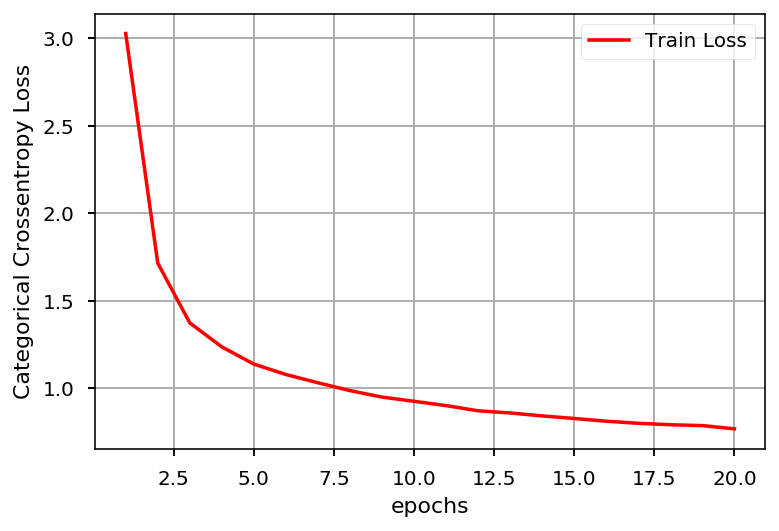

In [0]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,20+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

ty = history.history['loss']
plt_dynamic(x,ty)

## **CONCLUSION**

In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["MODEL","TEST ACCURACY"]

x.add_row(["VGG TRANSFER LEARNING WITH IMAGENET INITIALIZED WEIGHTS FINE TUNING ALL LAYERS","89%"])
x.add_row(["FINE TUNING LAST LAYER OF VGG WITH IMAGENET INITIALIZED WIEGHTS","85.23%"])
x.add_row(["FINE TUNING LAST 2 LAYER OF VGG WITH IMAGENET INITIALIZED WIEGHTS","86.60%"])
x.add_row(["Intra-Domain Transfer Learning and Stacked Generalization","95.13%" ])


print(x)

+--------------------------------------------------------------------------------+---------------+
|                                     MODEL                                      | TEST ACCURACY |
+--------------------------------------------------------------------------------+---------------+
| VGG TRANSFER LEARNING WITH IMAGENET INITIALIZED WEIGHTS FINE TUNING ALL LAYERS |      89%      |
|        FINE TUNING LAST LAYER OF VGG WITH IMAGENET INITIALIZED WIEGHTS         |     85.23%    |
|       FINE TUNING LAST 2 LAYER OF VGG WITH IMAGENET INITIALIZED WIEGHTS        |     86.60%    |
|           Intra-Domain Transfer Learning and Stacked Generalization            |     95.13%    |
+--------------------------------------------------------------------------------+---------------+




1.   We are using only 10k samples per class and we have observed that      increasing the data increases the accuracy
2.   We got our best model with Intra-domain Transfer learning technique which was taken from https://arxiv.org/abs/1801.09321 and we beat the score of 92% with great margin.95% accuracy was achieved with stacked generalization technique
